In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_drug_data,clinical_trial_data,on="Mouse ID",how="outer")

# Display the data table for preview
combine_data


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_mean=combine_data.groupby(['Timepoint','Drug']).mean().unstack(level='Drug')['Tumor Volume (mm3)']
tumor_vol_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem=combine_data.groupby(['Timepoint','Drug']).sem().unstack(level='Drug')['Tumor Volume (mm3)']
tumor_vol_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


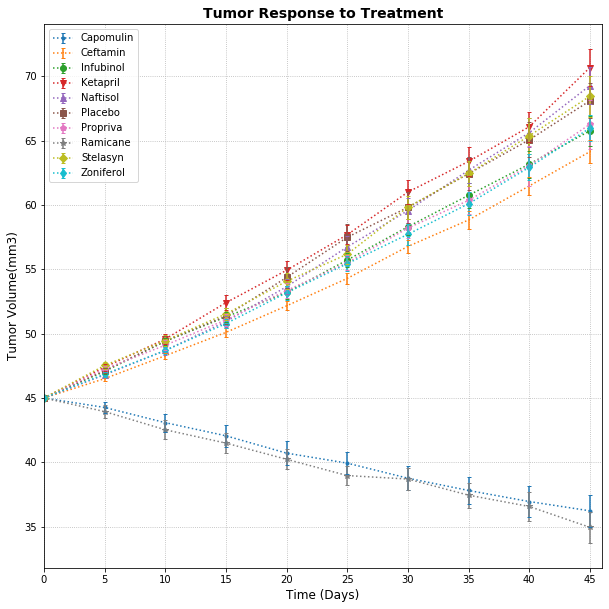

In [4]:
# Generate the Plot (with Error Bars)
x_axis=np.arange(0,50,5)

#set a marker list 
marker_list=['.', ',', 'o', 'v', '^', 's', 'p', '*','D','d']

#set up a figure with a decent size
fig1=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax1 = fig1.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in tumor_vol_mean.columns:
    ax1.errorbar(x_axis,tumor_vol_mean[drug],yerr=tumor_vol_sem[drug],fmt=marker_list[i],\
                barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Tumor Response to Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Tumor Volume(mm3)',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_site_mean=combine_data.groupby(['Timepoint','Drug']).mean().unstack(level='Drug')['Metastatic Sites']
tumor_site_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [6]:
# Store the Standard Error of Met. Site Data Grouped by Drug and Timepoint 
tumor_site_sem =combine_data.groupby(['Timepoint','Drug']).sem().unstack(level='Drug')['Metastatic Sites']
tumor_site_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


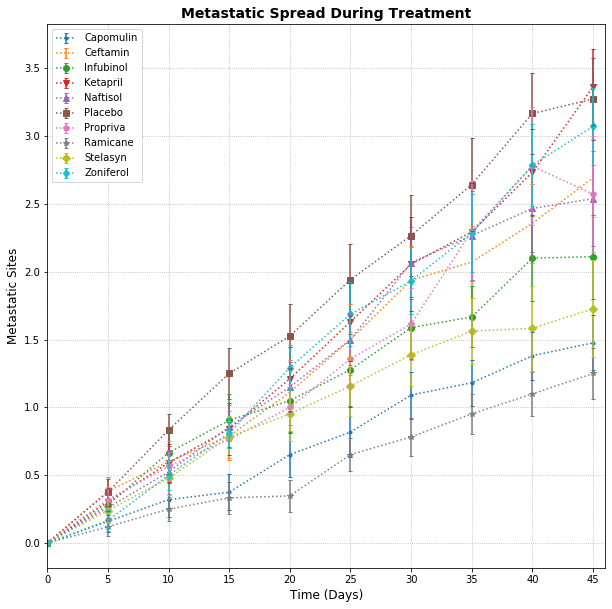

In [119]:
# Generate the Plot (with Error Bars)
#x_axis and marker list has been set above already

#set up a figure with a decent size
fig2=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax2 = fig2.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in tumor_site_mean.columns:
    ax2.errorbar(x_axis,tumor_site_mean[drug],yerr=tumor_site_sem[drug],fmt=marker_list[i],\
                 barsabove=True,capsize=2,linestyle='dotted',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='upper left')
plt.title('Metastatic Spread During Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Metastatic Sites',fontsize=12)
plt.grid(linestyle='dotted')
plt.show()

## Survival Rates

In [7]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_data.groupby(['Timepoint','Drug']).count().unstack(level='Drug')['Mouse ID']
mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [8]:
# Store the Rates of Survivel Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count =combine_data.groupby(['Timepoint','Drug']).count().unstack(level='Drug')['Mouse ID']
mice_survival_rate=(mice_count.iloc[:,:]/mice_count.iloc[0,:])*100
mice_survival_rate

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


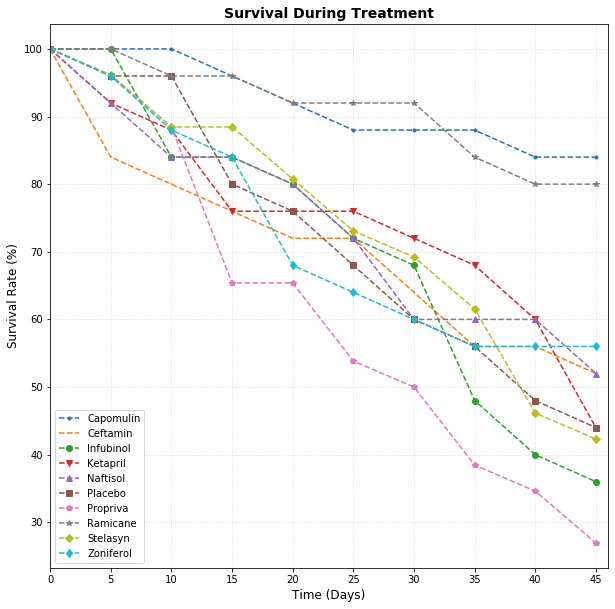

In [9]:
# Generate the Plot (Accounting for percentages)
#x_axis and marker list has been set above already

#set up a figure with a decent size
fig3=plt.figure(figsize=(10,10))

#set ax1 as add subplot
ax3 = fig3.add_subplot(111)

#use a for loop to extract all the mean for all timepoints for each drug one by one
#use i to access different markers in marker_list
i=0
for drug in mice_survival_rate.columns:
    ax3.errorbar(x_axis,mice_survival_rate[drug],marker=marker_list[i],\
                linestyle='--',label=drug)
    i+=1

#adjust plot properties
plt.legend(loc='lower left')
plt.title('Survival During Treatment',fontsize=14,fontweight='bold')
plt.xlim(min(x_axis),max(x_axis)+1)
plt.xticks(x_axis)
plt.xlabel('Time (Days)',fontsize=12)
plt.ylabel('Survival Rate (%)',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
plt.show()

## Summary Bar Graph

In [10]:
tumor_volume_change_percentage=(100*(tumor_vol_mean.iloc[9,:]-tumor_vol_mean.iloc[0,:])/\
                                tumor_vol_mean.iloc[0,:])
print(tumor_volume_change_percentage)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


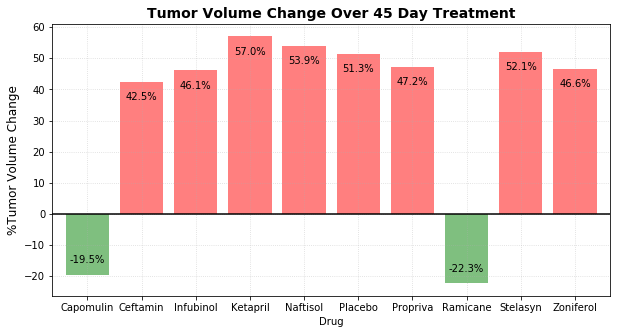

In [11]:
def _color_list_(series):
    color_list=[]
    for value in series.values:
        if value<0:
            color_list.append('g')
        else:
            color_list.append('r')
    return color_list

#plot a figure and set a resonable figure size
plt.figure(figsize=(10,5))

#pass tumor_volume_change_percentage to _color_list_ function and get a color_list
color_list=_color_list_(tumor_volume_change_percentage)

#plot the bar graph with corresponding color and other properties
ax4 = tumor_volume_change_percentage.plot(kind='bar',color=color_list,alpha=0.5,width=0.8)

#change the x_tick label rotation to 0 (somehow the default is 90 degree)
for tick in ax4.get_xticklabels():
    tick.set_rotation(0)
    
#plot a horizontal line spanning the entire xaxis at y=0 
plt.axhline(y=0,color='k')

#get label, grid,titles
ax4.set_ylabel('%Tumor Volume Change',fontsize=12)
plt.grid(linestyle='dotted',alpha=0.5)
ax4.set_title("Tumor Volume Change Over 45 Day Treatment",fontsize=14,fontweight='bold')

#____________________________________________________________
#Part II:Adding values at each bar
#_____________________________________________________________

#initiate a rects list for each rectangle from the bar graph
rects = ax4.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    # Number of points between bar and label. 
    #I want to place the label inside the bar so I set it up to a negative number
    space = -20
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}%".format(y_value)
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va) 

plt.show()